In [4]:
import gym
import JSSEnv # an ongoing issue with OpenAi's gym causes it to not import automatically external modules, see: https://github.com/openai/gym/issues/2809
# for older version of gym, you have to use 
#env = gym.make('JSSEnv:jss-v1', env_config={'instance_path': 'INSTANCE_PATH'})
import disjunctive_graph_jss_env as DisjunctiveGraphJssEnv

env = gym.make('jss-v1', env_config={'instance_path': '/Users/felix/miniconda3/envs/vid_tut/lib/python3.7/site-packages/JSSEnv/envs/instances/dmu16'})
#env = gym.make('jss-v1')



ModuleNotFoundError: No module named 'disjunctive_graph_jss_env'

In [ ]:
state=env.reset()
env.render()
#print(state)


/Users/felix/miniconda3/envs/vid_tut/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:175: UserWarning:

WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.

/Users/felix/miniconda3/envs/vid_tut/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:191: UserWarning:

WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.

/Users/felix/miniconda3/envs/vid_tut/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:196: UserWarning:

WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.

/Users/felix/miniconda3/envs/vid_tut/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:142: UserWarning:

WARN: The obs returned by the `reset()` method was expecting numpy array

In [ ]:
import numpy as np
legal_action=state['action_mask']
action=np.random.choice(len(legal_action), 1, p=(legal_action / legal_action.sum()))[0]
new_state, reward, done, info=env.step(action)
env.render()


/Users/felix/miniconda3/envs/vid_tut/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:228: DeprecationWarning:

WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 

/Users/felix/miniconda3/envs/vid_tut/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:142: UserWarning:

WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: bool



In [ ]:
import copy
finished_after=[]
for j in range(1):
    state=env.reset()
    for i in range(9999):
        legal_action=state['action_mask']
        action=np.random.choice(len(legal_action), 1, p=(legal_action / legal_action.sum()))[0]
        state, reward, done, info=env.step(action)
        if done==True:
            print(f"finished! no legal actions possible after {i} steps")
            finished_after.append(i)
            break

        #sleep(1)
import time
env.render()
x=time.time()
env_tmp=copy.deepcopy(env)
y=time.time()
print(y-x)


finished! no legal actions possible after 680 steps


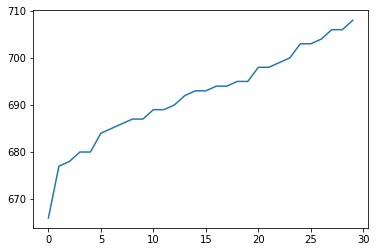

In [ ]:
finished_after.sort()

from matplotlib import pyplot as plt
plt.plot(finished_after)